# Feature Engineering 1 Assignment
    1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
    2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
    3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

## Import the Data and Clean the Data

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
                    postgres_user, postgres_pw, postgres_host, 
                    postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# check for any NAN items in the dataframe
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# what are the stats of the test scores
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 1. Is the data normally distributed? Apply Box Cox

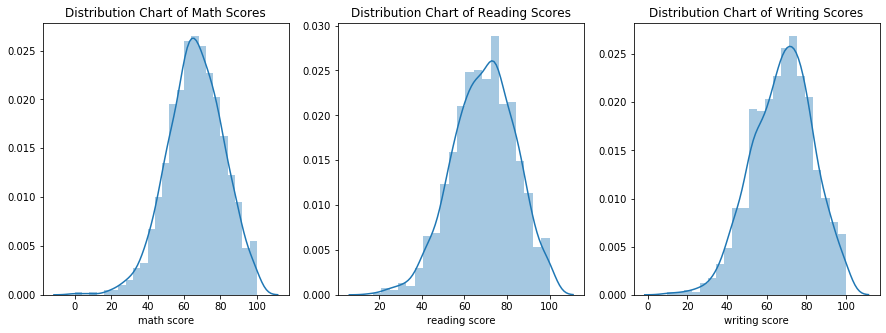

In [6]:
plt.figure(figsize=(15,5))

# create a distribution plot to check normality
plt.subplot(1, 3, 1)
sns.distplot(df['math score'])
plt.title('Distribution Chart of Math Scores')

plt.subplot(1, 3, 2)
sns.distplot(df['reading score'])
plt.title('Distribution Chart of Reading Scores')

plt.subplot(1, 3, 3)
sns.distplot(df['writing score'])
plt.title('Distribution Chart of Writing Scores')

plt.show()

### Interpreting the Charts
Looking at the charts the data for the most part is normally distirbuted. Lets see what happens when we apply a boxcox to them.

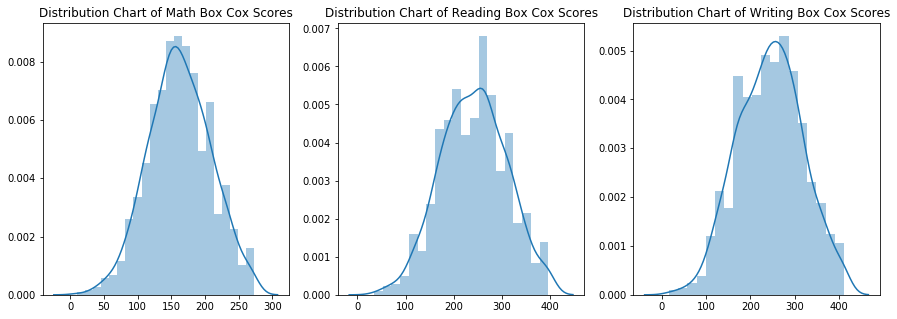

In [7]:
# noted that the min math score was 0 above
# box cox needs variables to be positive

# creating the box cox variables
math_cox,_ = boxcox(df[df['math score']>0]['math score'])
read_cox,_ = boxcox(df['reading score'])
write_cox,_ = boxcox(df['writing score'])

# ploting the box cox scores
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.distplot(math_cox)
plt.title('Distribution Chart of Math Box Cox Scores')

plt.subplot(1, 3, 2)
sns.distplot(read_cox)
plt.title('Distribution Chart of Reading Box Cox Scores')

plt.subplot(1, 3, 3)
sns.distplot(write_cox)
plt.title('Distribution Chart of Writing Box Cox Scores')

plt.show()

## 2. Combine Scores and Apply Box Cox

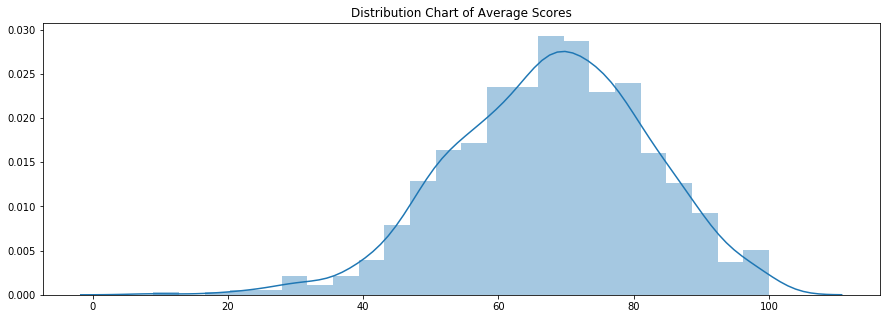

In [8]:
# create weighted average of all three scores
avg_score = (df['math score']+df['reading score']
             +df['writing score'])/3

# plot the avg_score
plt.figure(figsize=(15,5))
sns.distplot(avg_score)
plt.title('Distribution Chart of Average Scores')
plt.show()

In [11]:
# statiscally check normality
jb_stats = jarque_bera(avg_score)
norm_stats = normaltest(avg_score)

print('Jarque-Bera test statistics is {} and p value is {}'.
      format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {} and p value is {}'.
      format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


### Interpreting the Chart and Stats
As you can see in the figures above the data is mostly normalized. The high t-value and low p-value indicate that the data is not normally distirbuted. 

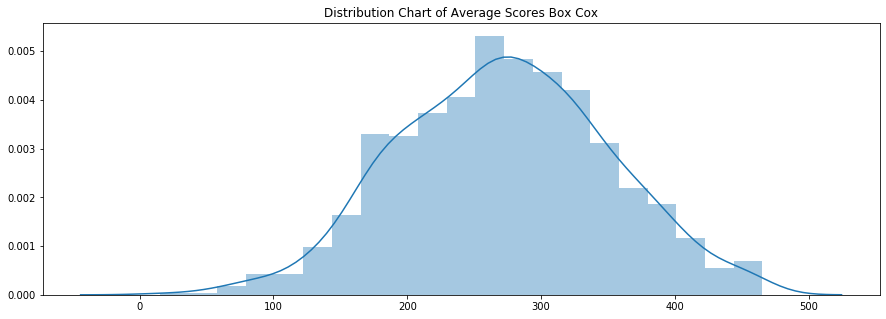

In [15]:
# create box cox for average score
avg_score_cox,_ = boxcox(avg_score)

# plot the avg_score_cox
plt.figure(figsize=(15,5))
sns.distplot(avg_score_cox)
plt.title('Distribution Chart of Average Scores Box Cox')
plt.show()

In [16]:
jb_stats = jarque_bera(avg_score_cox)
norm_stats = normaltest(avg_score_cox)

print('Jarque-Bera test statistics is {} and p value is {}'.
      format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {} and p value is {}'.
      format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


### Interpreting the Chart and Stats
As you can see in the figures above the data is  normalized. The high t-value and low p-value indicate that the data is normally distirbuted. 

## 3. Which Variable is Related to the Target Variable?
This mainly depends on what the target variable is. If it is to see what factors affect specific tests than the disaggregated variables would be best. If one wants to see what factors affect the overall test scores the aggregated scores would be the most useful.